# Wrangling and Analyzing WeRateDogs Twitter Account (DAND project)
Abdullah Almuzaini

## Table of Contents
- [Introduction](#intro)
- [Part I - Data Gathering](#Gathering)
- [Part II - Data Assessment](#Assessment)
- [Part III - Data Cleaning](#cleaning)
- [Part IV - Datat Storing](#store)
- [Part V - Analyzing and Visualizing Data](#A&VD)
- [Part VI - Refrences](#refrences)

<a id='intro'></a>
# Introduction 

Data wrangling is a fundamental skill every data analyst should acquire simply because data is almost always is not clean and needs countless time to prepare it for an analysis project involving. In fact, wrangling data is a necessary process before beginning analyzing data. The reason is that when data is not wrangled well, it would be negatively reflected on the analysis outcomes. 

In this project, I will gather the data from a few different sources, and it will be in three different formats. After collecting the data, I will try to inspect it, looking for quality and tidiness issues using various available methods, including visual and programmatical assessments. Then, I will go through the cleaning process to fix the issues addressed in the assessment stage. Last but not least, I will store the data in the current working directory in the format of `CSV,` and the data will be ready for the next step. Finally, I will analyze the data we have, extracting some insights and meanings hidden in the data. 

The dataset that I will be wrangling, then analyzing and visualizing is the tweet archive of Twitter user <a href="https://twitter.com/dog_rates">@dog_rates</a>, also known as <a href="https://en.wikipedia.org/wiki/WeRateDogs">WeRateDogs</a>. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.  


<a id='Gathering'></a>
# Part I - Data Gathering

> Gathering the Pieces of datasets required for the project. In this case, three datasets will be fetched and dowlnloaded into the notebook
> The three datasets are:
>    - I will download WeRateDogs twitter account archive, which is hosted on Udacity server on this <a herf="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv"> link</a> as `csv` format. I will use Python requests library to download the dataset.
>    - The tweet image predictions, which is also hosted on Udacity server on this <a herf = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"> link</a> formatted as `tsv`. I will use Python requests library to download the dataset.
>    - The other data I will be gathering is the tweets retweet counts and favorite counts for each tweet in the two datasets I gathered in the previous steps. I will use tweetpy API to go through WeRateDogs twitter's account and extract the retweet and favorite counts of each tweets and store them in a new dataset.



#### Importing the necessary libraries

In [1]:
import requests
import os
import pandas as pd
import tweepy
import json
from tqdm import tqdm
pd.set_option('display.max_rows', None, 'display.max_columns',None)
import numpy as np
import re
import ast
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
%config InlineBackend.figure_format = 'retina'

### Below cell contains two functions:
> - new_folder() to create new folder
> - get_files() to download files from the internet programmticly 




In [2]:

def new_folder(folder_name): 
    """
    this funcation creates a new directory in the currnet running directory when it's called
    """
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)


def get_files(file_name, url):
    """
    The following function download any file from the internet using requests library and save it in the 'dataset' directory. 
    note about the file_name: 
    the file_name var has to include the file format


    """ 
    response = requests.get(url)
    with open(os.path.join('dataset', url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)


In [3]:
# Create a new folder if it does not exist 
new_folder('dataset')

In [4]:
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'

data = get_files(file_name = "twitter-archive-enhanced.csv", url= URL  )
df = pd.read_csv('dataset'+ '/'+'twitter-archive-enhanced.csv', parse_dates=True)
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# The URL to `image-predictions.tsv` dataset

URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Download the dataset 

data = get_files(file_name = "image-predictions.tsv", url= URL)

# Read the dataset in pandas DataFrame
img_pred = pd.read_csv('dataset/image-predictions.tsv', sep='\t')
img_pred.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
img_pred.shape

(2075, 12)

### Setting up tweetpy 

In [7]:
# Twitter Credentials
with open('twitter/twitter.txt','r') as twtt:


    ACCESS_TOKEN = str(twtt.readline()).strip()
    ACCESS_TOKEN_SECRET = str(twtt.readline()).strip()
    CONSUMER_KEY = str(twtt.readline()).strip()
    CONSUMER_SECRET = str(twtt.readline()).strip()

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [103]:
# Test the api
tweet = api.get_status(677187300187611136)
print(tweet.user.screen_name)

dog_rates


> #### The following block of code will collect three pieces of data about each tweet
> and these pieces of data are:
>    - tweet_id (will be brought from 'twitter-archive-enhanced.csv'
>    - retweet_count (will be collected using tweetpy.api)
>    - favorite_count (will be collected using tweetpy.api)

> #### These pieces of data will be added to a dict var in order to save them in json format


In [58]:
data = {}
data['tweet_info']=  []
for i in tqdm(df['tweet_id']):
    try:
        tweet = api.get_status(i)
        data['tweet_info'].append({
            'tweet_id' : i ,
            'retweet_count': tweet.retweet_count ,
            'likes_count' : tweet.favorite_count
        })
    except:
        print("The tweet associated to the tweet id", i," was not found")


  1%|          | 21/2356 [00:04<09:14,  4.21it/s]

The tweet associated to the tweet id 888202515573088257  was not found


  4%|▍         | 97/2356 [00:18<07:07,  5.28it/s]

The tweet associated to the tweet id 873697596434513921  was not found


  4%|▍         | 103/2356 [00:19<06:31,  5.75it/s]

The tweet associated to the tweet id 872668790621863937  was not found


  4%|▍         | 106/2356 [00:19<06:12,  6.05it/s]

The tweet associated to the tweet id 872261713294495745  was not found


  5%|▌         | 120/2356 [00:22<07:00,  5.32it/s]

The tweet associated to the tweet id 869988702071779329  was not found


  6%|▌         | 134/2356 [00:24<06:46,  5.47it/s]

The tweet associated to the tweet id 866816280283807744  was not found


  7%|▋         | 157/2356 [00:28<06:01,  6.08it/s]

The tweet associated to the tweet id 861769973181624320  was not found


  8%|▊         | 183/2356 [00:35<13:02,  2.78it/s]

The tweet associated to the tweet id 856602993587888130  was not found


  8%|▊         | 187/2356 [00:36<11:39,  3.10it/s]

The tweet associated to the tweet id 856330835276025856  was not found


  9%|▉         | 213/2356 [00:41<06:08,  5.82it/s]

The tweet associated to the tweet id 851953902622658560  was not found


 11%|█         | 249/2356 [00:47<06:38,  5.28it/s]

The tweet associated to the tweet id 845459076796616705  was not found


 11%|█         | 255/2356 [00:48<05:42,  6.14it/s]

The tweet associated to the tweet id 844704788403113984  was not found


 11%|█         | 262/2356 [00:49<05:55,  5.89it/s]

The tweet associated to the tweet id 842892208864923648  was not found


 13%|█▎        | 298/2356 [00:56<05:36,  6.11it/s]

The tweet associated to the tweet id 837366284874571778  was not found


 13%|█▎        | 300/2356 [00:56<05:45,  5.94it/s]

The tweet associated to the tweet id 837012587749474308  was not found


 15%|█▌        | 365/2356 [01:08<05:28,  6.06it/s]

The tweet associated to the tweet id 829374341691346946  was not found


 16%|█▋        | 384/2356 [01:12<06:34,  5.00it/s]

The tweet associated to the tweet id 827228250799742977  was not found


 22%|██▏       | 508/2356 [01:34<05:08,  5.98it/s]

The tweet associated to the tweet id 812747805718642688  was not found


 24%|██▍       | 568/2356 [01:46<04:54,  6.08it/s]

The tweet associated to the tweet id 802247111496568832  was not found


 32%|███▏      | 752/2356 [02:19<04:31,  5.90it/s]

The tweet associated to the tweet id 779123168116150273  was not found


 33%|███▎      | 786/2356 [02:26<05:02,  5.19it/s]

The tweet associated to the tweet id 775096608509886464  was not found


 35%|███▍      | 817/2356 [02:31<04:15,  6.02it/s]

The tweet associated to the tweet id 771004394259247104  was not found


 35%|███▍      | 820/2356 [02:32<05:09,  4.96it/s]

The tweet associated to the tweet id 770743923962707968  was not found


 36%|███▌      | 843/2356 [02:36<04:20,  5.80it/s]

The tweet associated to the tweet id 766864461642756096  was not found


 38%|███▊      | 889/2356 [02:44<04:10,  5.85it/s]

The tweet associated to the tweet id 759923798737051648  was not found


 38%|███▊      | 892/2356 [02:44<04:12,  5.80it/s]

The tweet associated to the tweet id 759566828574212096  was not found


 40%|███▉      | 934/2356 [15:11<04:07,  5.74it/s]    

The tweet associated to the tweet id 754011816964026368  was not found


 73%|███████▎  | 1727/2356 [17:37<01:41,  6.20it/s]

The tweet associated to the tweet id 680055455951884288  was not found


100%|██████████| 2356/2356 [31:53<00:00,  1.23it/s]    


In [6]:
# Create a text file in the current directory and save each tweet's retweet count and favorite ("like") count
# in text file as json format

with open('tweet_json1.txt', 'w') as outfile:
    json.dump(data, outfile)

> ### Below, I will load "tweet_json.txt" into the notebook and print it out to see how it looks

In [8]:
# Read 'tweet.txt' line by line
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
    for p in data['tweet_info']:
        print('Tweet id: ' , p['tweet_id'])
        print('Retweet count: ' , p['retweet_count'])
        print('Likes count: ' , p['likes_count'])
        print('')

Tweet id:  892420643555336193
Retweet count:  7189
Likes count:  34531

Tweet id:  892177421306343426
Retweet count:  5396
Likes count:  29940

Tweet id:  891815181378084864
Retweet count:  3562
Likes count:  22530

Tweet id:  891689557279858688
Retweet count:  7413
Likes count:  37769

Tweet id:  891327558926688256
Retweet count:  7947
Likes count:  36071

Tweet id:  891087950875897856
Retweet count:  2672
Likes count:  18197

Tweet id:  890971913173991426
Retweet count:  1715
Likes count:  10603

Tweet id:  890729181411237888
Retweet count:  16176
Likes count:  58118

Tweet id:  890609185150312448
Retweet count:  3712
Likes count:  25055

Tweet id:  890240255349198849
Retweet count:  6247
Likes count:  28574

Tweet id:  890006608113172480
Retweet count:  6296
Likes count:  27595

Tweet id:  889880896479866881
Retweet count:  4274
Likes count:  25085

Tweet id:  889665388333682689
Retweet count:  8560
Likes count:  42978

Tweet id:  889638837579907072
Retweet count:  3818
Likes count:

Tweet id:  838201503651401729
Retweet count:  9442
Likes count:  0

Tweet id:  838150277551247360
Retweet count:  313
Likes count:  1596

Tweet id:  838085839343206401
Retweet count:  1
Likes count:  134

Tweet id:  838083903487373313
Retweet count:  2920
Likes count:  16870

Tweet id:  837820167694528512
Retweet count:  7353
Likes count:  32564

Tweet id:  837482249356513284
Retweet count:  417
Likes count:  3693

Tweet id:  837471256429613056
Retweet count:  2119
Likes count:  12259

Tweet id:  837110210464448512
Retweet count:  2228
Likes count:  15411

Tweet id:  836989968035819520
Retweet count:  2168
Likes count:  12238

Tweet id:  836753516572119041
Retweet count:  4363
Likes count:  18538

Tweet id:  836677758902222849
Retweet count:  2083
Likes count:  12112

Tweet id:  836648853927522308
Retweet count:  519
Likes count:  0

Tweet id:  836397794269200385
Retweet count:  25817
Likes count:  0

Tweet id:  836380477523124226
Retweet count:  2816
Likes count:  14189

Tweet id:  83


Tweet id:  800443802682937345
Retweet count:  4146
Likes count:  0

Tweet id:  800388270626521089
Retweet count:  2690
Likes count:  10856

Tweet id:  800188575492947969
Retweet count:  3798
Likes count:  0

Tweet id:  800141422401830912
Retweet count:  2450
Likes count:  14854

Tweet id:  800018252395122689
Retweet count:  12634
Likes count:  27527

Tweet id:  799774291445383169
Retweet count:  4488
Likes count:  0

Tweet id:  799757965289017345
Retweet count:  2068
Likes count:  8153

Tweet id:  799422933579902976
Retweet count:  1846
Likes count:  7858

Tweet id:  799308762079035393
Retweet count:  5230
Likes count:  0

Tweet id:  799297110730567681
Retweet count:  2635
Likes count:  9599

Tweet id:  799063482566066176
Retweet count:  2394
Likes count:  7862

Tweet id:  798933969379225600
Retweet count:  4299
Likes count:  12707

Tweet id:  798925684722855936
Retweet count:  1391
Likes count:  7322

Tweet id:  798705661114773508
Retweet count:  6402
Likes count:  0

Tweet id:  7987

Retweet count:  1797
Likes count:  6316

Tweet id:  771770456517009408
Retweet count:  3219
Likes count:  11554

Tweet id:  771500966810099713
Retweet count:  2484
Likes count:  7969

Tweet id:  771380798096281600
Retweet count:  4816
Likes count:  10129

Tweet id:  771171053431250945
Retweet count:  7069
Likes count:  0

Tweet id:  771136648247640064
Retweet count:  2778
Likes count:  8804

Tweet id:  771102124360998913
Retweet count:  1369
Likes count:  5993

Tweet id:  771014301343748096
Retweet count:  1576
Likes count:  6637

Tweet id:  770787852854652928
Retweet count:  1143
Likes count:  4747

Tweet id:  770772759874076672
Retweet count:  1354
Likes count:  4988

Tweet id:  770655142660169732
Retweet count:  1706
Likes count:  7088

Tweet id:  770414278348247044
Retweet count:  1989
Likes count:  6093

Tweet id:  770293558247038976
Retweet count:  1390
Likes count:  5970

Tweet id:  770093767776997377
Retweet count:  2894
Likes count:  0

Tweet id:  770069151037685760
Retweet co

Likes count:  4970

Tweet id:  737800304142471168
Retweet count:  3244
Likes count:  9468

Tweet id:  737678689543020544
Retweet count:  1232
Likes count:  4754

Tweet id:  737445876994609152
Retweet count:  4169
Likes count:  9692

Tweet id:  737322739594330112
Retweet count:  753
Likes count:  3402

Tweet id:  737310737551491075
Retweet count:  6927
Likes count:  13862

Tweet id:  736736130620620800
Retweet count:  1599
Likes count:  3992

Tweet id:  736392552031657984
Retweet count:  6852
Likes count:  16749

Tweet id:  736365877722001409
Retweet count:  1153
Likes count:  3759

Tweet id:  736225175608430592
Retweet count:  2614
Likes count:  7670

Tweet id:  736010884653420544
Retweet count:  2761
Likes count:  7429

Tweet id:  735991953473572864
Retweet count:  1063
Likes count:  3379

Tweet id:  735648611367784448
Retweet count:  1037
Likes count:  3825

Tweet id:  735635087207878657
Retweet count:  2200
Likes count:  5814

Tweet id:  735274964362878976
Retweet count:  4679
Likes

Retweet count:  959
Likes count:  3637

Tweet id:  701889187134500865
Retweet count:  1295
Likes count:  3345

Tweet id:  701805642395348998
Retweet count:  1562
Likes count:  3227

Tweet id:  701601587219795968
Retweet count:  427
Likes count:  1985

Tweet id:  701570477911896070
Retweet count:  874
Likes count:  2664

Tweet id:  701545186879471618
Retweet count:  574
Likes count:  2523

Tweet id:  701214700881756160
Retweet count:  4771
Likes count:  11564

Tweet id:  700890391244103680
Retweet count:  528
Likes count:  2104

Tweet id:  700864154249383937
Retweet count:  585
Likes count:  2464

Tweet id:  700847567345688576
Retweet count:  466
Likes count:  2340

Tweet id:  700796979434098688
Retweet count:  881
Likes count:  2310

Tweet id:  700747788515020802
Retweet count:  8685
Likes count:  21549

Tweet id:  700518061187723268
Retweet count:  744
Likes count:  2466

Tweet id:  700505138482569216
Retweet count:  541
Likes count:  2170

Tweet id:  700462010979500032
Retweet count:

Retweet count:  2240
Likes count:  7227

Tweet id:  683357973142474752
Retweet count:  854
Likes count:  2740

Tweet id:  683142553609318400
Retweet count:  980
Likes count:  2715

Tweet id:  683111407806746624
Retweet count:  846
Likes count:  3220

Tweet id:  683098815881154561
Retweet count:  612
Likes count:  2053

Tweet id:  683078886620553216
Retweet count:  531
Likes count:  1895

Tweet id:  683030066213818368
Retweet count:  696
Likes count:  2039

Tweet id:  682962037429899265
Retweet count:  15306
Likes count:  34656

Tweet id:  682808988178739200
Retweet count:  158
Likes count:  1678

Tweet id:  682788441537560576
Retweet count:  1047
Likes count:  2343

Tweet id:  682750546109968385
Retweet count:  409
Likes count:  1438

Tweet id:  682697186228989953
Retweet count:  341
Likes count:  1248

Tweet id:  682662431982772225
Retweet count:  1013
Likes count:  2882

Tweet id:  682638830361513985
Retweet count:  556
Likes count:  1956

Tweet id:  682429480204398592
Retweet count:

Tweet id:  675113801096802304
Retweet count:  709
Likes count:  1784

Tweet id:  675111688094527488
Retweet count:  223
Likes count:  882

Tweet id:  675109292475830276
Retweet count:  1027
Likes count:  2587

Tweet id:  675047298674663426
Retweet count:  288
Likes count:  965

Tweet id:  675015141583413248
Retweet count:  1080
Likes count:  2484

Tweet id:  675006312288268288
Retweet count:  206
Likes count:  895

Tweet id:  675003128568291329
Retweet count:  424
Likes count:  1427

Tweet id:  674999807681908736
Retweet count:  995
Likes count:  2048

Tweet id:  674805413498527744
Retweet count:  326
Likes count:  785

Tweet id:  674800520222154752
Retweet count:  779
Likes count:  2762

Tweet id:  674793399141146624
Retweet count:  987
Likes count:  2286

Tweet id:  674790488185167872
Retweet count:  226
Likes count:  1015

Tweet id:  674788554665512960
Retweet count:  188
Likes count:  736

Tweet id:  674781762103414784
Retweet count:  1082
Likes count:  1841

Tweet id:  67477448175


Tweet id:  669564461267722241
Retweet count:  108
Likes count:  352

Tweet id:  669393256313184256
Retweet count:  65
Likes count:  324

Tweet id:  669375718304980992
Retweet count:  649
Likes count:  1205

Tweet id:  669371483794317312
Retweet count:  155
Likes count:  444

Tweet id:  669367896104181761
Retweet count:  137
Likes count:  414

Tweet id:  669363888236994561
Retweet count:  207
Likes count:  566

Tweet id:  669359674819481600
Retweet count:  109
Likes count:  339

Tweet id:  669354382627049472
Retweet count:  1134
Likes count:  2453

Tweet id:  669353438988365824
Retweet count:  234
Likes count:  575

Tweet id:  669351434509529089
Retweet count:  166
Likes count:  395

Tweet id:  669328503091937280
Retweet count:  380
Likes count:  928

Tweet id:  669327207240699904
Retweet count:  111
Likes count:  518

Tweet id:  669324657376567296
Retweet count:  190
Likes count:  449

Tweet id:  669216679721873412
Retweet count:  361
Likes count:  1085

Tweet id:  669214165781868544


> #### Convert 'tweet_json.txt' to a pandas dataframe 

In [9]:
# Read 'tweet.txt' line by line into a pandas dataframe with tweet_id, retweet_count, and likes_count
tweet_json_df = pd.json_normalize(data['tweet_info'])


In [10]:
tweet_json_df.head()

,tweet_id,retweet_count,likes_count
0,892420643555336193,7189,34531
1,892177421306343426,5396,29940
2,891815181378084864,3562,22530
3,891689557279858688,7413,37769
4,891327558926688256,7947,36071


<a id='Assessment'></a>
# Part II - Data Assessment 

> - #### In this part of my project, I will assess the three datasets I already gathered in the previous part in terms of quality and tidiness.


### Assessing WeRateDogs twitter account archive table



In [11]:
df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1931,674036086168010753,NaN,NaN,2015-12-08 01:21:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Daisy. She has no eyes &amp; her face has...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674036086...,9,10,Daisy,None,None,None,None
938,753294487569522689,NaN,NaN,2016-07-13 18:26:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ace. He's a window washer. One of the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753294487...,11,10,Ace,None,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,None
1819,676590572941893632,6.765883e+17,4.196984e+09,2015-12-15 02:32:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After some outrage from the crowd. Bubbles is ...,NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
58,880935762899988482,NaN,NaN,2017-06-30 23:47:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's crossing. It's a big deal....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880935762...,13,10,Louis,None,None,None,None
1613,685315239903100929,NaN,NaN,2016-01-08 04:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I would like everyone to appreciate this pup's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685315239...,11,10,None,None,None,None,None
2083,670811965569282048,NaN,NaN,2015-11-29 03:50:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Maggie. She enjoys her stick in the yard....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670811965...,10,10,Maggie,None,None,None,None
405,823939628516474880,NaN,NaN,2017-01-24 17:04:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cash. He's officially given pup on tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/823939628...,12,10,Cash,None,None,None,None
1283,708711088997666817,NaN,NaN,2016-03-12 17:47:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Smokey. He really likes tennis balls. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708711088...,11,10,Smokey,None,None,None,None
1639,684177701129875456,NaN,NaN,2016-01-05 01:00:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kulet. She's very proud of the flower ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684177701...,10,10,Kulet,None,None,None,None


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
df[df['text'].str.contains('RT')].shape[0]

192

In [15]:
df[df.tweet_id ==710609963652087808][['tweet_id','expanded_urls','source']]

,tweet_id,expanded_urls,source
1255,710609963652087808,https://vine.co/v/idaTpwH5TgU,"<a href=""http://vine.co"" rel=""nofollow"">Vine -..."


In [16]:
df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [17]:
print(df.duplicated(subset=['expanded_urls']).sum())


137


In [18]:
for i in range(len(df[:1])):
    print(df.text.loc[i])

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU



#### Qaulity

- Missing values in cloumns `reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `doggo`, `floofer`, `pupper`, `puppo`, `expanded_urls`
- `text` comlumn contains retweets 
- `name` comlumn cintains Inappropriate names ["a", "the", "None",'O','all','old']
- Incorrect `expanded_urls` for `tweet_id` 812503143955202048 and 710609963652087808
- Incorrect `source`,`expanded_urls` for `tweet_id` 710609963652087808
- imporper datatypes (`in_reply_to_status_id`, `in_reply_to_user_id`, `timestamp`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)
- Null values are represented as 'None' instead of 'NaN'
- Some tweet ids have invalid `rating_numerator` and `rating_denominator`
- There 137 duplicates

#### Tidiness

- Since we are only interested in looking at orginal tweets, we do not need the following variables(`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp`)
- Some recordes in `source` contain has html tags
- Some tweets' texts in `text` column begain with "RT" followed by a twitter account. 
- `doggo` `floofer` `pupper` `puppo`should be in one Column
- Tweet texts contain URLs at the end

### Assessing `img_pred` table

In [19]:
img_pred.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
759,688804835492233216,https://pbs.twimg.com/media/CY8gWFRWUAAm1XL.jpg,3,malinois,0.199512,True,German_shepherd,0.096797,True,Saluki,0.082848,True
707,685169283572338688,https://pbs.twimg.com/media/CYI10WhWsAAjzii.jpg,1,Bernese_mountain_dog,0.975096,True,Appenzeller,0.014578,True,EntleBucher,0.005943,True
1778,828408677031882754,https://pbs.twimg.com/media/C38ZSzlWIAEpQzs.jpg,1,Weimaraner,0.133033,True,Chesapeake_Bay_retriever,0.092227,True,American_Staffordshire_terrier,0.065094,True
1567,794205286408003585,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,3,pedestal,0.662660,False,fountain,0.294827,False,brass,0.020371,False
1892,849336543269576704,https://pbs.twimg.com/media/C8lzFC4XcAAQxB4.jpg,1,patio,0.521788,False,prison,0.149544,False,restaurant,0.027153,False
907,700462010979500032,https://pbs.twimg.com/media/CbiKe7-W0AIVNNr.jpg,1,hamster,0.678651,False,Pomeranian,0.110268,True,Angora,0.104139,False
1766,826848821049180160,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,4,Great_Pyrenees,0.858764,True,golden_retriever,0.023526,True,Pekinese,0.017104,True
350,672488522314567680,https://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg,1,Doberman,0.605358,True,Rottweiler,0.108382,True,Appenzeller,0.077798,True
91,667544320556335104,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1,Pomeranian,0.412893,True,Pembroke,0.312958,True,Chihuahua,0.071960,True
992,708109389455101952,https://pbs.twimg.com/media/CdO1u9vWAAApj2V.jpg,1,Staffordshire_bullterrier,0.516106,True,American_Staffordshire_terrier,0.236075,True,kelpie,0.069750,True


In [20]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

img_pred['p1'].value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
malamute                           30
cocker_spaniel                     30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
Siberian_husky                     20
German_shepherd                    20
Staffordshire_bullterrier          20
Cardigan                           19
web_site                           19
Shetland_sheepdog                  18
Eskimo_dog                         18
teddy                              18
beagle                             18
Maltese_dog                        18
Lakeland_terrier                   17
Shih-Tzu    

In [22]:
img_pred.query('tweet_id ==671547767500775424').jpg_url

312    https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg
Name: jpg_url, dtype: object

In [23]:
img_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [24]:
img_pred.jpg_url.duplicated( keep='first').sum()


66

#### Qaulity 
- Underscore sign spearates words in (`p1`, `p2`,`p3`) columns.
- Captalization of Breads of dogs' types in (`p1`, `p2`,`p3`) columns are not consistant. 
- The predictions of dog breed for `tweet_id`s (717790033953034240,675135153782571009,671547767500775424)  are not correct in the three algorithms 
- The dog in image from `tweet_id` 669015743032369152 is not real dog 
- 66 duplicates in `jpg_url` column


### Assessing `tweet_json_df`  table



In [25]:
tweet_json_df.head()

,tweet_id,retweet_count,likes_count
0,892420643555336193,7189,34531
1,892177421306343426,5396,29940
2,891815181378084864,3562,22530
3,891689557279858688,7413,37769
4,891327558926688256,7947,36071


<a id='cleaning'></a>
# Part III - Data Cleaning
### Define
- Merge the `df` &`img_pred` & `tweet_json_df` into one master dataframe named `master_df`
- Create a copy of the master dataset

### Code

In [26]:
#  merging the three datasets in one master dataset

master_df = pd.merge(df, img_pred, how = 'left', on = ['tweet_id'] )
master_df = pd.merge(master_df,tweet_json_df, how = 'left', on =['tweet_id'] )
master_df.to_csv('dataset'+'/'+'master_df.csv', encoding='utf-8', index =False)
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,likes_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7189.0,34531.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5396.0,29940.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3562.0,22530.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7413.0,37769.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7947.0,36071.0


In [27]:
# Test the dataset file
print(pd.read_csv('dataset/master_df.csv').shape)
pd.read_csv('dataset/master_df.csv').head(1)


(2356, 30)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,likes_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,7189.0,34531.0


In [28]:
# Create a copy dataset from master_df to preserve the original dataset unchanged

master_copy = master_df.copy()
master_copy.shape

(2356, 30)

## Tidiness 


##### Define
- Remove variables(`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp`,`in_reply_to_status_id`,`in_reply_to_user_id`)

#### Code

In [29]:
master_copy.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], inplace = True)

#### Test

In [30]:
master_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'likes_count'],
      dtype='object')

#### Define 
- Remove the HTML tags from `source` column and extract the tweet's source 


#### Code

In [31]:
master_copy.source[4]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [32]:
sources = []
for source in master_copy.source:
    sources.append(re.findall(r'>(.*)<',source)[0])
master_copy.source = sources

In [33]:
master_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [34]:
master_copy.source = master_copy.source.apply(lambda x : "Vine" if x =='Vine - Make a Scene' else x)
master_copy.source.value_counts()


Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

##### Test

In [35]:
len(master_copy.source) == len(master_copy)

True

In [36]:
master_copy.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

In [37]:
master_copy.source.sample(5)

1162    Twitter for iPhone
897     Twitter for iPhone
1766    Twitter for iPhone
922     Twitter for iPhone
810     Twitter for iPhone
Name: source, dtype: object

#### Define 
- Remove Retweets from the dataset 



#### Code

In [38]:
# Count the number of retweet in the dataset

master_copy.text.str.startswith('RT @').sum()

181

In [39]:
# Removie retweets from the dataset

mask = master_copy[master_copy.text.str.startswith('RT @')].index
master_copy.drop(mask ,inplace = True)


#### Test

In [40]:
# Check if there is any retweet in the dataset
master_copy.text.str.startswith('RT @').sum()


0

In [41]:
(len(master_copy)+ 181) == 2356

True


#### Define 

-  Reshape the dataframe by putting those identifier variables into one column `doggo` `floofer` `pupper` `puppo`should be in one Column


#### Code

In [42]:
# putting the columns we want to keep in a list
columns = ['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name','jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'likes_count']



In [43]:
# melt the dog stages columns into one columns 

master_copy = pd.melt(master_copy, id_vars= columns,value_vars= ['doggo', 'floofer', 'pupper', 'puppo'],
            var_name="type", value_name="dog_stage" )

#### Test

In [44]:
master_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,likes_count,type,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7189.0,34531.0,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5396.0,29940.0,doggo,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3562.0,22530.0,doggo,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7413.0,37769.0,doggo,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7947.0,36071.0,doggo,None


In [45]:
master_copy.dog_stage.value_counts()

None       8344
pupper      234
doggo        87
puppo        25
floofer      10
Name: dog_stage, dtype: int64

In [46]:
master_copy.drop(columns = ['type'], inplace = True)

In [47]:
master_copy = master_copy.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')
master_copy.dog_stage.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_stage, dtype: int64

In [48]:
master_copy.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,likes_count,dog_stage
7430,738537504001953792,2016-06-03 01:07:16 +0000,Twitter for iPhone,This is Bayley. She fell asleep trying to esca...,https://twitter.com/dog_rates/status/738537504...,11,10,Bayley,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1.0,chow,0.808737,True,gibbon,0.028942,False,Pembroke,0.026498,True,1436.0,4811.0,puppo
7059,790946055508652032,2016-10-25 16:00:09 +0000,Twitter for iPhone,This is Betty. She's assisting with the dishes...,https://twitter.com/dog_rates/status/790946055...,12,10,Betty,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1.0,dishwasher,0.700466,False,golden_retriever,0.245773,True,chow,0.039012,True,4504.0,16234.0,puppo
7395,743253157753532416,2016-06-16 01:25:36 +0000,Twitter for iPhone,This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1.0,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True,1147.0,4024.0,puppo
7276,756275833623502848,2016-07-21 23:53:04 +0000,Twitter for iPhone,When ur older siblings get to play in the deep...,https://twitter.com/dog_rates/status/756275833...,10,10,None,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1.0,Airedale,0.602957,True,Irish_terrier,0.086981,True,bloodhound,0.086276,True,1444.0,6098.0,puppo
7298,752519690950500352,2016-07-11 15:07:30 +0000,Twitter for iPhone,Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11,10,None,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3.0,swing,0.999984,False,Labrador_retriever,0.000010,True,Eskimo_dog,0.000001,True,3242.0,7026.0,puppo


In [49]:
master_copy.shape

(2175, 22)

#### Define

- Remove URLs from tweet texts

#### Code

In [50]:
string = master_copy.text.iloc[4]

In [51]:

for i in range(len(master_copy.text)):
    h = master_copy.text.iloc[i]
    try:
        indx = h.find(re.search("(?P<url>https?://[^\s]+)", h).group("url"))
        master_copy.text.iloc[i] = h[:indx].strip()
    except:
        master_copy.text.iloc[i] = h.strip()
    


/Users/mozaini/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Test

In [52]:
master_copy.text.sample(5)

4778    This is Craig. That's actually a normal sized ...
3789    Meet Humphrey. He's a Northern Polyp Viagra. O...
3588    This pup's having a nightmare that he forgot t...
3717    This is Reggie. His Santa hat is a little big....
3731    This is Hunter. He was playing with his ball m...
Name: text, dtype: object

- The first issue listed under <b>Quality</b> has been delt with when fixing <b>Tidiness</b> issues

- Replace all string None in the dataset with np.nan 


#### Code

In [53]:
# Check nulls before run the code
master_copy.isnull().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
expanded_urls          58
rating_numerator        0
rating_denominator      0
name                    0
jpg_url               181
img_num               181
p1                    181
p1_conf               181
p1_dog                181
p2                    181
p2_conf               181
p2_dog                181
p3                    181
p3_conf               181
p3_dog                181
retweet_count           8
likes_count             8
dog_stage               0
dtype: int64

In [54]:
# Replace all string None in the dataset with np.nan 
master_copy.replace(to_replace="None", value=np.nan, inplace =True)

#### Test

In [55]:
# Check nulls after running the code
master_copy.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
expanded_urls           58
rating_numerator         0
rating_denominator       0
name                   680
jpg_url                181
img_num                181
p1                     181
p1_conf                181
p1_dog                 181
p2                     181
p2_conf                181
p2_dog                 181
p3                     181
p3_conf                181
p3_dog                 181
retweet_count            8
likes_count              8
dog_stage             1831
dtype: int64

In [56]:
master_copy.name.isnull().sum()

680

#### Define

- Fix incorrect data types
    - `timestamp` to datetime
    - `img_num` to int
    - `retweet_count` to int
    - `likes_count` to int
    - `p1_dog` to boolen
    - `p2_dog` to boolen
    - `p2_dog` to boolen
    
#### Code

In [57]:
# Check Before converting

master_copy.dtypes

tweet_id                int64
timestamp              object
source                 object
text                   object
expanded_urls          object
rating_numerator        int64
rating_denominator      int64
name                   object
jpg_url                object
img_num               float64
p1                     object
p1_conf               float64
p1_dog                 object
p2                     object
p2_conf               float64
p2_dog                 object
p3                     object
p3_conf               float64
p3_dog                 object
retweet_count         float64
likes_count           float64
dog_stage              object
dtype: object

In [58]:
# Converting 

master_copy.timestamp = pd.to_datetime(master_copy.timestamp).dt.date
master_copy.timestamp = pd.to_datetime(master_copy.timestamp)
master_copy['img_num'] = master_copy['img_num'].fillna(0).astype('int')
master_copy['retweet_count'] = master_copy['retweet_count'].fillna(0).astype('int')
master_copy['likes_count'] = master_copy['likes_count'].fillna(0).astype('int')
master_copy.p1_dog = master_copy.p1_dog.astype('bool') 
master_copy.p2_dog = master_copy.p2_dog.astype('bool') 
master_copy.p3_dog = master_copy.p3_dog.astype('bool') 

#### Test

In [59]:
# Check after converting

master_copy.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
jpg_url                       object
img_num                        int64
p1                            object
p1_conf                      float64
p1_dog                          bool
p2                            object
p2_conf                      float64
p2_dog                          bool
p3                            object
p3_conf                      float64
p3_dog                          bool
retweet_count                  int64
likes_count                    int64
dog_stage                     object
dtype: object

#### Define 
- Clean records containing inappropriate names

#### Code

In [60]:
# Check the number of records containing incorrect names
master_copy.query("name == 'a' | name == 'the' | name != name| name == 'O' | name == 'all' | name =='old'")[['name']].count()


name    66
dtype: int64

In [61]:
tweet_texts = list(master_copy.text)
dog_names = list(master_copy.name)

for i in range(len(master_copy)):
    text = tweet_texts[i]
    name = dog_names[i]
    
#     Look for any tweet starts with "This is" and has a caotilized word after it
    if text.startswith("This is ") and re.match(r'[A-Z].*', text.split()[2]):
        if text.split(" ")[2].replace('.',"").strip() != name:
            extracted_name = text.split(" ")[2].strip().replace('.',"").replace(",",'').replace("-"," ")
            dog_names[i] = extracted_name
            master_copy.name.iloc[i] = dog_names[i]
            
#    check for the existing of the word 'named' in tweet's text 
#    compare the word after 'named' with the name in column `name`
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[0]):
            text = text.split()
            named_index = text.index('named')
            extracted_name = text[named_index+1].replace('.','')
            if extracted_name != name:
                master_copy.name.iloc[i]  = extracted_name
#   Look for names that appear after "his/her name"

    elif 'his name ' in text or 'His name ' in text or "Her name " in text or "her name " in text and re.match(r'[A-Z].*', text.split()[0]):
        text = text.split()
        name_index = text.index('name')
        extracted_name = text[name_index+2].replace('.','').replace(",","")
        master_copy.name.iloc[i] = extracted_name
        
#   Look for names after the phrase 'here we have '
#   Compare them with the existing names
    elif 'Here we have ' in text and re.match(r'[A-Z].*', text.split()[0]):
        text = text.split()[3]
        if text != name and re.match(r'[A-Z].*', text.split()[0]):
            master_copy.name.iloc[i] = text
            

    elif "This is a " in text or "This is an " in text and re.match(r'[A-Z].*', text.split()[2]):
        text = text.split()
        if name =='a' or name == 'an' and re.match(r'[A-Z].*', text.split()[0]):
            master_copy.name.iloc[i] = np.nan
    
    elif "This is " in text and re.match(r'[A-Z].*', text.split()[2]):
        text = text.split()
        master_copy.name.iloc[i] = text[2]
#    After doing the above we can savely replace ['the','old','a', all'] with NaN
# Because they the names don't appear in the text
    elif name == 'all' or name == 'the' or name == 'old' or name == 'a':
        master_copy.name.iloc[i] = np.nan
  


#### Test

In [62]:
master_copy.query("name == 'a' | name == 'the' | name != name| name == 'O' | name == 'all' | name =='old'")[['name']].count()

name    0
dtype: int64

#### Define 
- Fix `expanded_urls` for `tweet_id` 812503143955202048 
- Fix `source` for `tweet_id` 710609963652087808


#### Code



In [63]:
master_copy.query('tweet_id == 812503143955202048 | tweet_id ==710609963652087808  ')[['tweet_id','source','expanded_urls']]


,tweet_id,source,expanded_urls
3251,710609963652087808,Vine,https://vine.co/v/idaTpwH5TgU
2596,812503143955202048,Twitter for iPhone,https://m.facebook.com/story.php?story_fbid=18...


In [64]:
tweet_ids = [812503143955202048, 710609963652087808]
tweet = api.get_status(812503143955202048)
for i in tweet_ids:
    tweet = api.get_status(i)
    if tweet.entities['urls'][0]['expanded_url'] != master_copy.loc[master_copy.tweet_id==i].expanded_urls.to_string(index=False):
        print(tweet.entities['urls'][0]['expanded_url'])
        print(i)
        ind = master_copy.loc[master_copy.tweet_id==i].expanded_urls.index
        master_copy.expanded_urls.loc[ind] = tweet.entities['urls'][0]['expanded_url']


https://twitter.com/i/web/status/812503143955202048
812503143955202048


/Users/mozaini/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [65]:
source = master_copy[master_copy.tweet_id ==710609963652087808 ].source.to_string(index=False).split('-')
source = source[0].strip()
source
master_copy.source[master_copy.tweet_id ==710609963652087808 ]= source

<ipython-input-65-7e9ca0d3aa15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_copy.source[master_copy.tweet_id ==710609963652087808 ]= source


#### Test

In [66]:
master_copy.loc[master_copy.tweet_id==812503143955202048].expanded_urls

2596    https://twitter.com/i/web/status/8125031439552...
Name: expanded_urls, dtype: object

In [67]:
master_copy.query('tweet_id == 812503143955202048 | tweet_id ==710609963652087808  ')[['tweet_id','source','expanded_urls']]


,tweet_id,source,expanded_urls
3251,710609963652087808,Vine,https://vine.co/v/idaTpwH5TgU
2596,812503143955202048,Twitter for iPhone,https://twitter.com/i/web/status/8125031439552...


#### Define 
- Fix invalid `rating_numerator` and `rating_denominator`


#### Code

In [68]:
master_copy.query('rating_numerator <= rating_denominator ').tweet_id.count()

877

In [69]:
# Check how many ratings we can get from tweets
master_copy.text.apply(lambda x: re.findall(r'(\d+/\d+)', text)).count()


2175

In [70]:

for i in range(len(master_copy)):
    text = master_copy.text.iloc[i]
    rate = re.findall(r'(\d+/\d+)', text)
    old_rate = str(master_copy.rating_numerator.iloc[i])+ '/'+ str(master_copy.rating_denominator.iloc[i])
# It looks that some tweets have more than one rating and rating caputured in the
# the dataset is the first rating
# The solution to this can be taking the average of the numerator of the extracted ratings
        
    if len(rate) > 1:
      
        if len(rate) == 2:
            numerator = (int(rate[0].split('/')[0])+int(rate[1].split('/')[0]))/2
            master_copy.rating_numerator.iloc[i] = numerator
#             print(str(numerator)+'/'+str(master_copy.rating_denominator.iloc[i]),' ', rating)
        elif len(rate) ==3:
            numerator = (int(rate[0].split('/')[0])+int(rate[1].split('/')[0])+ int(rate[2].split('/')[0]))/3
            master_copy.rating_numerator.iloc[i] = round(numerator,1)
        else:
            master_copy.rating_numerator.iloc[i] = np.nan
            master_copy.rating_denominator.iloc[i] = np.nan

/Users/mozaini/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


- After checking the records containing a numerator greater than the denominator, most of those recorders matched the actual rating mentioned in the tweets. The others that did not match the rating in the tweets' texts were due to the existence of more than one dog's rating. 

#### Define
- Remove Underscores from (`p1`, `p2`,`p3`)


#### Code

In [71]:
master_copy[['p1','p2','p3']] = master_copy[['p1','p2','p3']].apply(lambda x: x.str.replace("_"," "))


#### Test


In [72]:
master_copy[['p1','p2','p3']].head()

,p1,p2,p3
2095,goose,drake,hen
2094,Labrador retriever,French bulldog,Staffordshire bullterrier
2093,Tibetan terrier,Irish terrier,Yorkshire terrier
2092,toy poodle,pug,Lakeland terrier
2091,borzoi,ice bear,weasel


In [73]:
master_copy[['p1','p2','p3']].tail()

,p1,p2,p3
7430,chow,gibbon,Pembroke
7059,dishwasher,golden retriever,chow
7395,malamute,Siberian husky,Eskimo dog
7276,Airedale,Irish terrier,bloodhound
7298,swing,Labrador retriever,Eskimo dog


#### Define 
- Captalize dogs' breeds in in columns (`p1`, `p2`,`p3`) 


#### Code

In [74]:
master_copy[['p1','p2','p3']] = master_copy[['p1','p2','p3']].apply(lambda x: x.str.capitalize())



#### Test

In [75]:
master_copy[['p1','p2','p3']].head()

,p1,p2,p3
2095,Goose,Drake,Hen
2094,Labrador retriever,French bulldog,Staffordshire bullterrier
2093,Tibetan terrier,Irish terrier,Yorkshire terrier
2092,Toy poodle,Pug,Lakeland terrier
2091,Borzoi,Ice bear,Weasel


In [76]:
master_copy[['p1','p2','p3']].tail()

,p1,p2,p3
7430,Chow,Gibbon,Pembroke
7059,Dishwasher,Golden retriever,Chow
7395,Malamute,Siberian husky,Eskimo dog
7276,Airedale,Irish terrier,Bloodhound
7298,Swing,Labrador retriever,Eskimo dog


#### Define
- Remove duplicates form  `jpg_url` column


#### code

In [77]:
master_copy[master_copy.jpg_url.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,likes_count,dog_stage
81,875097192612077568,2017-06-14,Twitter for iPhone,You'll get your package when that precious man...,https://twitter.com/drboondoc/status/874413398...,13.0,10,NaN,NaN,0,NaN,NaN,True,NaN,NaN,True,NaN,NaN,True,5249,24760,NaN
76,876537666061221889,2017-06-18,Twitter for iPhone,I can say with the pupmost confidence that the...,https://twitter.com/mpstowerham/status/8761629...,14.0,10,NaN,NaN,0,NaN,NaN,True,NaN,NaN,True,NaN,NaN,True,4070,21451,NaN
29,886267009285017600,2017-07-15,Twitter for iPhone,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12.0,10,NaN,NaN,0,NaN,NaN,True,NaN,NaN,True,NaN,NaN,True,3,104,NaN
68,878604707211726852,2017-06-24,Twitter for iPhone,Martha is stunning how h*ckin dare you. 13/10,https://twitter.com/bbcworld/status/8785998685...,13.0,10,NaN,NaN,0,NaN,NaN,True,NaN,NaN,True,NaN,NaN,True,6063,26987,NaN
33,885518971528720385,2017-07-13,Twitter for iPhone,I have a new hero and his name is Howard. 14/10,https://twitter.com/4bonds2carbon/status/88551...,14.0,10,Howard,NaN,0,NaN,NaN,True,NaN,NaN,True,NaN,NaN,True,3190,18389,NaN
61,879674319642796034,2017-06-27,Twitter for iPhone,@RealKentMurphy 14/10 confirmed,NaN,14.0,10,NaN,NaN,0,NaN,NaN,True,NaN,NaN,True,NaN,NaN,True,9,284,NaN
52,881633300179243008,2017-07-02,Twitter for iPhone,@roushfenway These are good dogs but 17/10 is ...,NaN,15.0,10,NaN,NaN,0,NaN,NaN,True,NaN,NaN,True,NaN,NaN,True,8,113,NaN
39,884247878851493888,2017-07-10,Twitter for iPhone,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,13.0,10,NaN,NaN,0,NaN,NaN,True,NaN,NaN,True,NaN,NaN,True,17343,64789,NaN
3511,690989312272396288,2016-01-23,Vine,We've got a doggy down. Requesting backup. 12/...,https://vine.co/v/iOZKZEU2nHq,12.0,10,NaN,NaN,0,NaN,NaN,True,NaN,NaN,True,NaN,NaN,True,2692,5600,NaN
3501,691793053716221953,2016-01-26,Vine,We usually don't rate penguins but this one is...,https://vine.co/v/OTTVAKw6YlW,10.0,10,NaN,NaN,0,NaN,NaN,True,NaN,NaN,True,NaN,NaN,True,3958,7692,NaN


In [78]:
tweet = api.get_status(704134088924532736)
tweet.entities

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [{'url': 'https://t.co/h5aI0Tim4j',
   'expanded_url': 'https://vine.co/v/igW2OEwu9vg',
   'display_url': 'vine.co/v/igW2OEwu9vg',
   'indices': [64, 87]}]}

#### Result
- After inspecting the column `jpg_url,` I have concluded that the duplicated values are resulted from
    - The absence of media URLs in the source 
    - A Copyright issue with the original tweets
    - Invalid tweet's URLs
    - Inline images in the original tweets
    - Deleted tweets
- As a result, `'jpg_url` column has been filled with null due to the above issues
- However, since those records still contain some information that I can use in my Analysis, such as ratings, I decided to keep them 

#### Define
- Remove records with incorrect predictions and invalid dogs picutres 


#### Code 

In [79]:

indeces = master_copy.query('tweet_id == 717790033953034240 | tweet_id == 675135153782571009 | tweet_id==671547767500775424 | tweet_id ==669015743032369152').index

In [80]:
master_copy.drop(indeces, inplace = True ) 

#### Test

In [81]:
master_copy.shape

(2171, 22)

#### Define 
- Drop unnecessary columns [`jpg_url`,`img_num`]


#### Code

In [82]:
master_copy.drop(columns=['jpg_url','img_num'], inplace = True)

#### Test

In [83]:
list(master_copy)


['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'likes_count',
 'dog_stage']

#### Define 
- capitalize Dog stages 


#### Code

In [84]:
master_copy.dog_stage= master_copy.dog_stage.str.capitalize()
# .apply(lambda x: x.str.capitalize())

#### Test

In [85]:
master_copy.dog_stage.unique()

array([nan, 'Doggo', 'Floofer', 'Pupper', 'Puppo'], dtype=object)

#### Define 
- Detect gender from tweet
- Store gender in a new column 


#### Code


In [86]:
male = ['he', 'him', 'his', "he's", 'himself']
female = ['she', 'her', 'hers', 'herself', "she's"]

In [87]:
def getGender(tweet):
    if any(map(lambda x: x in male, tweet)):
        return("Male")
    elif any(map(lambda x: x in female, tweet)):
        return("Female")
    else:
        return("Unkown")

In [88]:
gender = []
for text in master_copy.text:
    gender.append(getGender(text.lower().split()))

In [89]:
len(gender) == master_copy.shape[0]

True

In [90]:
master_copy['dog_gender'] = gender 

#### Test


In [91]:
master_copy['dog_gender'].shape[0]

2171

In [92]:
master_copy['dog_gender'].sample(5)

3546    Unkown
85      Unkown
711       Male
3915      Male
3       Female
Name: dog_gender, dtype: object

In [93]:
master_copy['dog_gender'].unique()

array(['Unkown', 'Male', 'Female'], dtype=object)

<a id='store'></a>
# Part IV - Datat Storing

- ##### Store the cleaned dataset in dataset direcory 

In [94]:
master_copy.to_csv('dataset/twitter_archive_master.csv', index = False)

<a id='A&VD'></a>
# Part V - Analyzing and Visualizing Data

In [95]:
df_master = pd.read_csv('dataset/twitter_archive_master.csv')

In [96]:
df_master.shape

(2171, 21)

In [97]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,likes_count,dog_stage,dog_gender
0,667443425659232256,2015-11-19,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,10,NaN,Goose,0.980815,False,Drake,0.006918,False,Hen,0.005255,False,513,698,NaN,Unkown
1,667453023279554560,2015-11-19,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10,Cupcake,Labrador retriever,0.825670,True,French bulldog,0.056639,True,Staffordshire bullterrier,0.054018,True,77,286,NaN,Unkown
2,667455448082227200,2015-11-19,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7.0,10,Reese,Tibetan terrier,0.676376,True,Irish terrier,0.054933,True,Yorkshire terrier,0.040576,True,55,175,NaN,Unkown
3,667470559035432960,2015-11-19,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11.0,10,Kohl,Toy poodle,0.304175,True,Pug,0.223427,True,Lakeland terrier,0.073316,True,87,227,NaN,Male
4,667491009379606528,2015-11-19,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7.5,10,NaN,Borzoi,0.852088,True,Ice bear,0.132264,False,Weasel,0.005730,False,199,469,NaN,Unkown


In [98]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2171 non-null   int64  
 1   timestamp           2171 non-null   object 
 2   source              2171 non-null   object 
 3   text                2171 non-null   object 
 4   expanded_urls       2113 non-null   object 
 5   rating_numerator    2171 non-null   float64
 6   rating_denominator  2171 non-null   int64  
 7   name                1459 non-null   object 
 8   p1                  1990 non-null   object 
 9   p1_conf             1990 non-null   float64
 10  p1_dog              2171 non-null   bool   
 11  p2                  1990 non-null   object 
 12  p2_conf             1990 non-null   float64
 13  p2_dog              2171 non-null   bool   
 14  p3                  1990 non-null   object 
 15  p3_conf             1990 non-null   float64
 16  p3_dog

In [99]:
df_master.dtypes

tweet_id                int64
timestamp              object
source                 object
text                   object
expanded_urls          object
rating_numerator      float64
rating_denominator      int64
name                   object
p1                     object
p1_conf               float64
p1_dog                   bool
p2                     object
p2_conf               float64
p2_dog                   bool
p3                     object
p3_conf               float64
p3_dog                   bool
retweet_count           int64
likes_count             int64
dog_stage              object
dog_gender             object
dtype: object

In [100]:
df_master.timestamp = pd.to_datetime(df_master.timestamp)
df_master.rating_numerator = df_master.rating_numerator.astype('int')

In [101]:
df_master[['rating_numerator','rating_denominator','retweet_count','likes_count']].describe()

,rating_numerator,rating_denominator,retweet_count,likes_count
count,2171.000000,2171.000000,2171.000000,2171.000000
mean,12.988485,10.493782,2291.104560,7728.677107
std,44.399094,7.025519,4086.316845,11424.970702
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,10.000000,490.500000,1619.000000
50%,11.000000,10.000000,1089.000000,3482.000000
75%,12.000000,10.000000,2604.500000,9570.500000
max,1776.000000,170.000000,72709.000000,148097.000000


In [102]:
df_master.rating_numerator.value_counts()

12      499
10      431
11      425
13      307
9       159
8       103
7        57
14       43
5        35
6        33
3        19
4        16
2         9
1         7
420       2
0         2
15        2
27        1
45        1
99        1
121       1
143       1
75        1
204       1
1776      1
666       1
486       1
182       1
144       1
88        1
84        1
80        1
60        1
44        1
30        1
26        1
24        1
20        1
165       1
Name: rating_numerator, dtype: int64

In [103]:
df_master.rating_denominator.value_counts()

10     2149
50        3
11        2
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [104]:
df_master[df_master.rating_numerator <= 12].rating_numerator.count()/df_master.rating_numerator.shape[0]

0.8268079226163059

In [105]:
df_master[df_master.rating_denominator == 10].rating_denominator.count()/df_master.rating_denominator.shape[0]

0.9898664210041456

> ##### As we can see from the above results., the majority, about 83%, of data in rating_numerator fall between 1 to 12. Also, most of the values in the rating_denominator column, approximately 99%, are equal to 10. 
> #### Therefore, I will exclude any record that does not have a rating_denominator of 10 and has a rating_numerator greater than 12.


In [106]:
# Limit the df to include only rating_denominator of 10 and  rating_numerator of 12 or below
adj_ratings_df = df_master.query('rating_denominator == 10 and rating_numerator <= 12').copy()
print(adj_ratings_df.shape)
adj_ratings_df.head()
adj_ratings_df.tail()

(1789, 21)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,likes_count,dog_stage,dog_gender
2166,738537504001953792,2016-06-03,Twitter for iPhone,This is Bayley. She fell asleep trying to esca...,https://twitter.com/dog_rates/status/738537504...,11,10,Bayley,Chow,0.808737,True,Gibbon,0.028942,False,Pembroke,0.026498,True,1436,4811,Puppo,Female
2167,790946055508652032,2016-10-25,Twitter for iPhone,This is Betty. She's assisting with the dishes...,https://twitter.com/dog_rates/status/790946055...,12,10,Betty,Dishwasher,0.700466,False,Golden retriever,0.245773,True,Chow,0.039012,True,4504,16234,Puppo,Female
2168,743253157753532416,2016-06-16,Twitter for iPhone,This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,Malamute,0.442612,True,Siberian husky,0.368137,True,Eskimo dog,0.177822,True,1147,4024,Puppo,Male
2169,756275833623502848,2016-07-21,Twitter for iPhone,When ur older siblings get to play in the deep...,https://twitter.com/dog_rates/status/756275833...,10,10,NaN,Airedale,0.602957,True,Irish terrier,0.086981,True,Bloodhound,0.086276,True,1444,6098,Puppo,Unkown
2170,752519690950500352,2016-07-11,Twitter for iPhone,Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11,10,NaN,Swing,0.999984,False,Labrador retriever,0.000010,True,Eskimo dog,0.000001,True,3242,7026,Puppo,Unkown


In [107]:
adj_ratings_df.apply(lambda x: len(x.unique()))

tweet_id              1789
timestamp              512
source                   4
text                  1789
expanded_urls         1756
rating_numerator        13
rating_denominator       1
name                   870
p1                     343
p1_conf               1670
p1_dog                   2
p2                     364
p2_conf               1669
p2_dog                   2
p3                     369
p3_conf               1671
p3_dog                   2
retweet_count         1339
likes_count           1618
dog_stage                5
dog_gender               3
dtype: int64

## Most popular dog stages

In [108]:
adj_ratings_df.groupby('dog_stage')['rating_numerator'].count()

dog_stage
Doggo       46
Floofer      7
Pupper     206
Puppo       13
Name: rating_numerator, dtype: int64

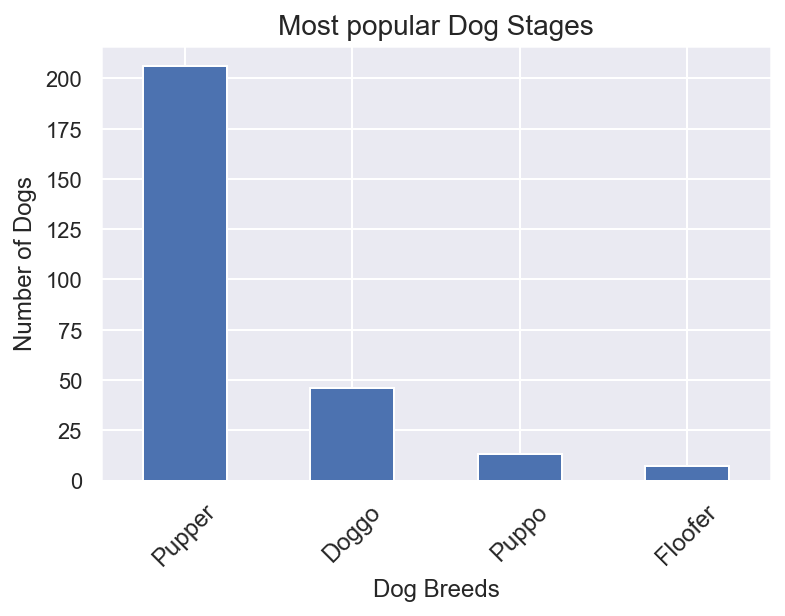

In [109]:
# The following chart will disply the most popular dog stages exist in our dataset

adj_ratings_df.dog_stage.value_counts().plot(kind='bar');
plt.title("Most popular Dog Stages", fontsize=14);
plt.xlabel('Dog Breeds');
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Number of Dogs', fontsize=12)
plt.savefig('images/popular_dog_stages.pdf')
plt.show();

## Dog Stages Ranked by the Average of Rating

In [110]:
adj_ratings_df.groupby('dog_stage')['rating_numerator'].mean()

dog_stage
Doggo      10.956522
Floofer    11.285714
Pupper     10.427184
Puppo      11.153846
Name: rating_numerator, dtype: float64

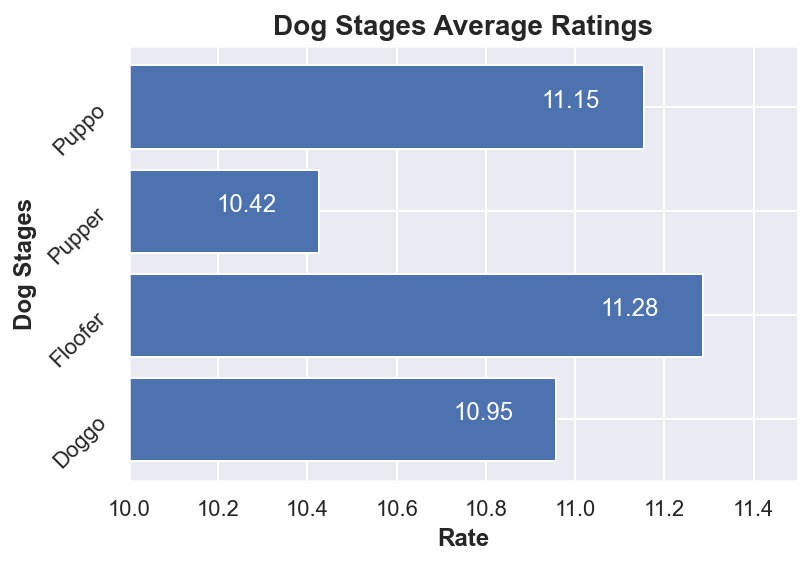

In [111]:
stage_by_rate = adj_ratings_df.groupby('dog_stage').rating_numerator.mean()
fig, ax = plt.subplots()
ax.barh(stage_by_rate.index, stage_by_rate.values)
plt.title("Dog Stages Average Ratings",fontsize=14, weight = 'bold');
plt.xlim(10, 11.5)
plt.yticks(rotation=45)
plt.xlabel('Rate',fontsize=12, weight = 'bold');
plt.ylabel('Dog Stages',fontsize=12, weight = 'bold')
for i, v in enumerate(stage_by_rate.values):
    ax.text(v-.23 , i , str(v)[:5], color='white')
plt.savefig('images/rank.pdf')
plt.show();

## Tweets sources in the dataset

In [112]:
# Tweets sources in the dataset
source = adj_ratings_df.source.value_counts()
source

Twitter for iPhone    1683
Vine                    73
Twitter Web Client      24
TweetDeck                9
Name: source, dtype: int64

In [113]:
# The percentage of each tweets sources in the dataset
for i in source.index:
    print(i, str(round((source[i]/adj_ratings_df.shape[0]) * 100))+'%')

Twitter for iPhone 94%
Vine 4%
Twitter Web Client 1%
TweetDeck 1%


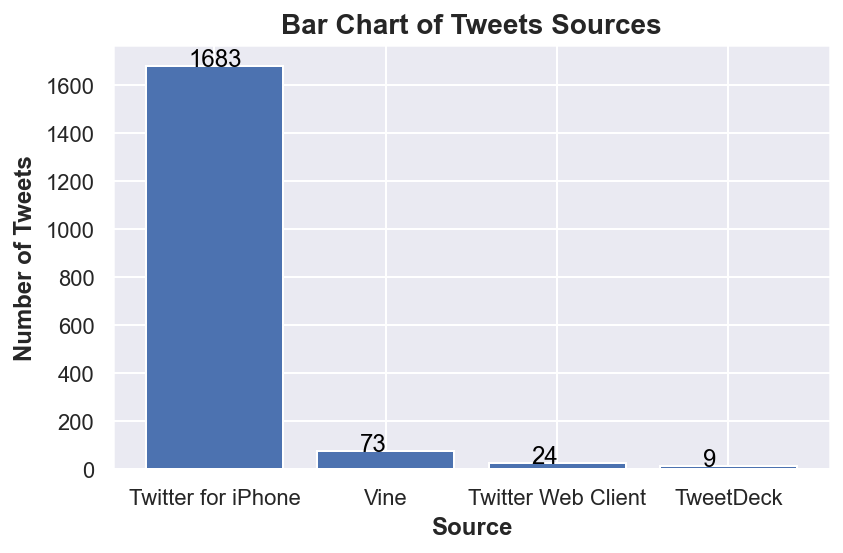

In [114]:
# Bar chart of tweets sources
source = adj_ratings_df.source.value_counts()
fig, ax = plt.subplots()
ax.bar(source.index, source.values)
plt.title('Bar Chart of Tweets Sources', weight= 'bold', fontsize = 14)
plt.xlabel('Source',fontsize=12, weight = 'bold')
plt.ylabel('Number of Tweets',fontsize=12, weight = 'bold')
for i, v in enumerate(source.values):
    ax.text(i-.15 , v ,v, color='black')
    
plt.tight_layout()
plt.savefig('images/tweet_source.pdf')

plt.show()

## Correlation Between `retweet_count`,`rating_numerator`,  and `likes_count` in a Heatmap

In [115]:
corr = adj_ratings_df[['retweet_count','rating_numerator', 'likes_count']]
corr.corr()

,retweet_count,rating_numerator,likes_count
retweet_count,1.000000,0.217242,0.912977
rating_numerator,0.217242,1.000000,0.286705
likes_count,0.912977,0.286705,1.000000


In [116]:
corr = corr.corr()

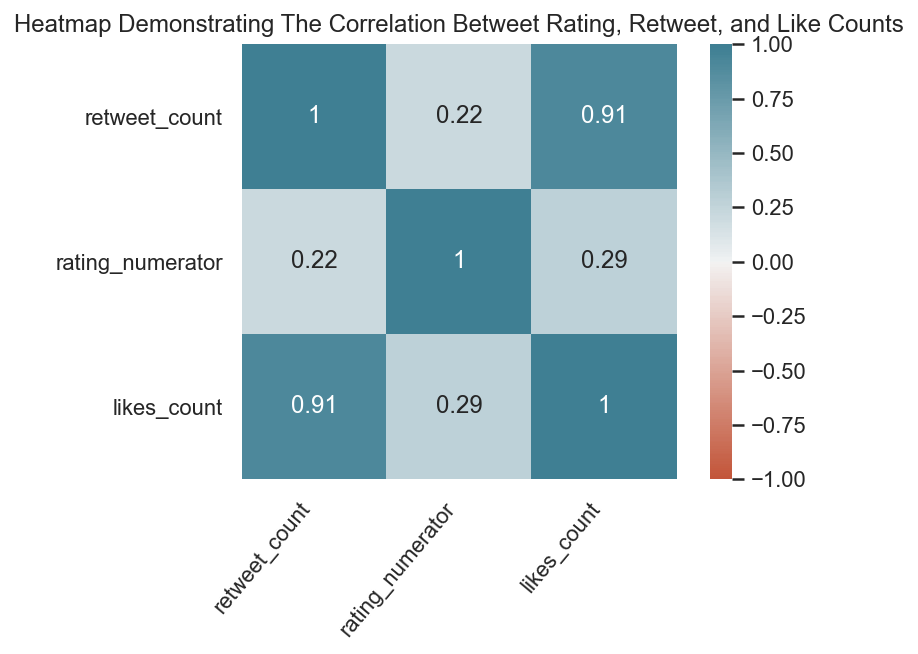

In [117]:

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='right'
);
plt.title('Heatmap Demonstrating The Correlation Betweet Rating, Retweet, and Like Counts')
plt.savefig('images/heatmap.pdf')
plt.show();


From the above heatmap we can see that there is a strong and postive correlation between the number of retweet and number of likes, while there is no Correlation between the those variables and ratings

## Popular Dogs' Names

In [118]:
adj_ratings_df.name.value_counts()[:10]

Penny      9
Lucy       9
Cooper     9
Winston    8
Charlie    8
Sadie      8
Oliver     7
Bailey     6
Bella      6
Tucker     6
Name: name, dtype: int64

## Dogs' Genders

#### plot a pie chat to show the percentage of each gender among dogs

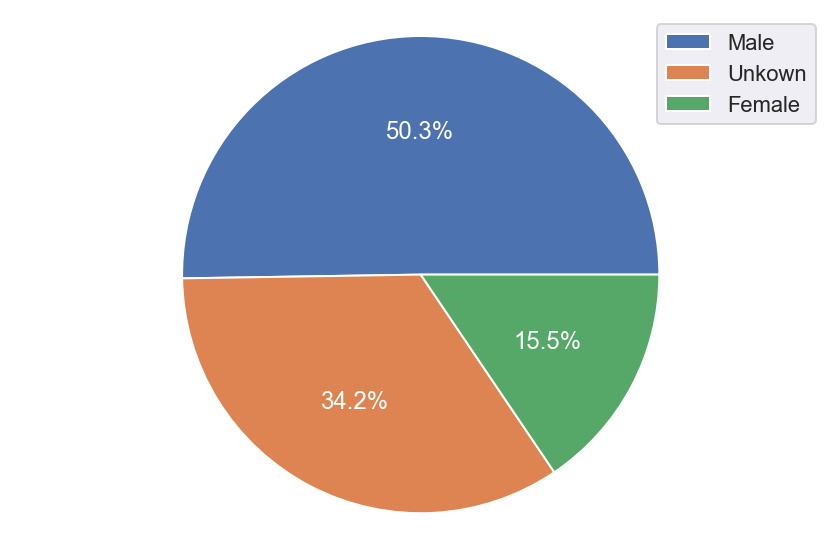

In [119]:
# Refrence 3

patches, _, autotexts = plt.pie(adj_ratings_df.dog_gender.value_counts(),  autopct='%1.1f%%');
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(patches, list(adj_ratings_df.dog_gender.value_counts().index), loc="best");
plt.axis('equal')
plt.tight_layout();
%config InlineBackend.figure_format = 'retina'
plt.savefig('images/figure.pdf')

## Find the average rating numerator per  each gender 

In [120]:
adj_ratings_df.groupby('dog_gender')['dog_gender','rating_numerator'].mean()

<ipython-input-120-9583af858349>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  adj_ratings_df.groupby('dog_gender')['dog_gender','rating_numerator'].mean()


,rating_numerator
dog_gender,
Female,10.737410
Male,10.140156
Unkown,9.800654


<a id='refrences'></a>
# Part VI - Refrences
- https://www.geeksforgeeks.org/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib/
- https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
- https://stackoverflow.com/questions/27898830/python-how-to-change-autopct-text-color-to-be-white-in-a-pie-chart/54149203
